In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

We will learn how to solve ordinary differential equations (ODEs) using numerical integration. An ODE is a formula that tells the rate of change for a certain variable. Concretely, this could describe population growth, velocity, or change in temperature. If we want to solve an ODE (to find the current population, position, or temperature), we need to integrate the equation. Sometimes it is difficult or even impossible to integrate an ODE directly (analytical solution). So instead, we can use numerical integration to get an approximate solution. With the appropriate amount of precision, we can get a reliable solution. We will consider two different models of population growth: exponential and logisitc growth.

# Exponential Growth

Bunnies! <br>

$ \frac{dB}{dt} = kB $ <br><br>
B = number of bunnies <br>
k = growth rate (per year) <br><br>
This ODE gives us the population growth of bunnies. It is exponential growth because the growth rate is proportional to the current population. If we are given an initial number of bunnies, we can approximate how many bunnies there will be next year. We can continue this process for as many years as we want. Specifically, we will be using the Euler method for numerical integration. This is an iterative process where we calculate the growth rate from the current bunny population, then add the result to the current bunny population. Each iteration is done in this manner until the maximum time is reached.

\begin{align}
f'(B) &= \frac{dB}{dt} \\
B_{n+1} &= B_n + f'(B_n)
\end{align}

Let's say we start with 2 bunnies (B = 2) <br> 
and a growth rate 1 per year (k = 1) <br>
How many bunnies will we have after 3 years?

Year 0: 2 bunnies <br>
Year 1: 2 + 3\*2  = 8 bunnies <br>
Year 2: 8 + 3\*8  = 32 bunnies <br>
Year 3: 32 + 3\*32 = 128 bunnies <br>

### Solving the equation separately for certain number of years

In [14]:
y = 0
B0 = 2
k = 1

print('Year',y)
print(B0,' bunnies')
print('')

y = 1
B1 = B0 + k*B0
print('Year',y)
print(B1,' bunnies')
print('')

y = 2
B2 = B1 + k*B1
print('Year',y)
print(B2,' bunnies')

Year 0
2  bunnies

Year 1
4  bunnies

Year 2
8  bunnies


### Solving the equation for any number of years with for loop

In [15]:
# quick example of euler method

y = 0
B = 2
k = 1

print('Year 0: {} bunnies'.format(B))

years = 10
for y in range(years):
    B = B + k*B
    print('Year {}: {} bunnies'.format(y+1, B))

Year 0: 2 bunnies
Year 1: 4 bunnies
Year 2: 8 bunnies
Year 3: 16 bunnies
Year 4: 32 bunnies
Year 5: 64 bunnies
Year 6: 128 bunnies
Year 7: 256 bunnies
Year 8: 512 bunnies
Year 9: 1024 bunnies
Year 10: 2048 bunnies


Below, the euler method is used calculating the new number of bunnies each year. We will compare the solution from the euler method with the exact solution of exponential growth: <br>

$ B = B_0e^{kt} $ <br>

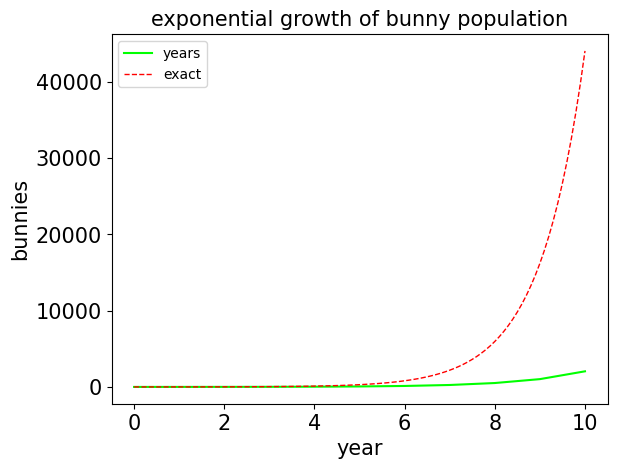

In [4]:
years = 10

# solving for each year with euler method
B = 2
k = 1
yvec_year = np.arange(years+1)
Bvec_year = [B]
for y in yvec_year[1:]:
    B = B + k*B
    Bvec_year.append(B)
    
# solving the formula analytically
k = 1 # growth rate per year
yvec = np.linspace(0,years,101)
zvec = 2*np.exp(k*yvec) # exponential growth analytical solution

plt.plot(yvec_year, Bvec_year, label='years', color='lime')
plt.plot(yvec, zvec, label='exact', color='red', linestyle='--', linewidth=1)
plt.title('exponential growth of bunny population',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('bunnies',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

In the case above, our numerical solution has too big a step size (1 year). This causes the estimation to vary greatly from the real solution. Instead, let's decrease the step size to months to see the effect on the system.

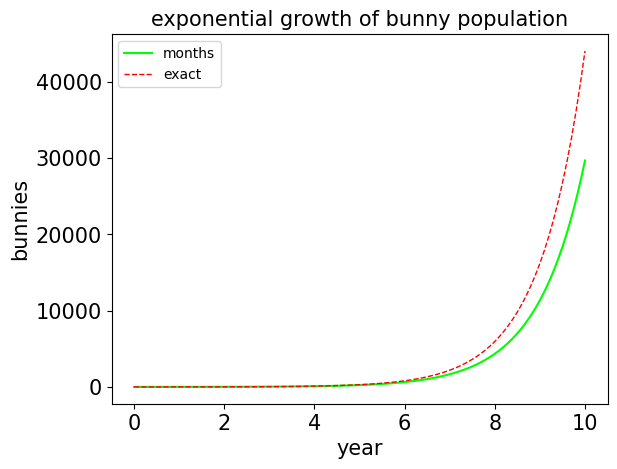

In [5]:
years = 10
months = years*12

# solving for each month
B = 2
k = 1/12 # need to adjust growth rate per month
yvec_month = np.arange(months+1) / 12
Bvec_month = [B]
for y in yvec_month[1:]:
    B = B + k*B
    Bvec_month.append(B)

# solving the formula analytically
k = 1 # growth rate per year
yvec = np.linspace(0,years,101)
zvec = 2*np.exp(k*yvec) # exponential growth analytical solution

plt.plot(yvec_month, Bvec_month, label='months', color='lime')
plt.plot(yvec, zvec, label='exact', color='red', linestyle='--', linewidth=1)
plt.title('exponential growth of bunny population',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('bunnies',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

Again our numerical solution is off, but we're getting closer! Let's decrease the step size again to days.

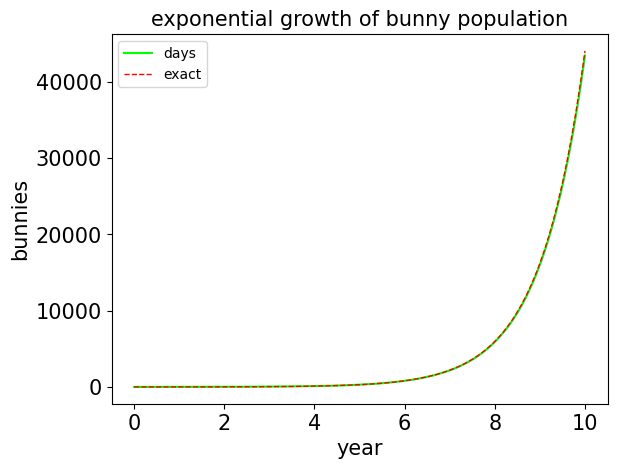

In [6]:
years = 10
months = years*12
days = years*365

# solving for each day
B = 2
k = 1/365 # need to adjust growth rate per day
yvec_day = np.arange(days+1) / 365
Bvec_day = [B]
for y in yvec_day[1:]:
    B = B + k*B
    Bvec_day.append(B)

# solving the formula analytically
k = 1 # growth rate per year
yvec = np.linspace(0,years,101)
zvec = 2*np.exp(k*yvec) # exponential growth analytical solution

plt.plot(yvec_day, Bvec_day, label='days', color='lime')
plt.plot(yvec, zvec, label='exact', color='red', linestyle='--', linewidth=1)
plt.title('exponential growth of bunny population',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('bunnies',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

# Solving models using odeint

odeint is a package from scipy that integrates ordinary differential equations (ODEs). It uses higher order methods compared to Euler integration, but the overall procedure is similar. It is still the case that the population at the next step is calculated using the current population and the current growth rate.

First define a Python function that calculates the value of the rate of change. This does **not** add the current population of bunnies like we did before. The function odeint will automatically take this step into account. We only need to write how much the population of bunnies **changes** in the next time step (this is the differential equation dB/dt).

In [7]:
def exponential(B,t):
    dB = k*B
    return dB

In [8]:
def logistic(B,t):
    dB = k*B*(1-B/C)
    return dB

Next, define an initial value and a vector of timepoints

In [16]:
ky = 1     # per year
C = 10000  # carrying capacity
B0 = 2     # initial population of bunnies
years = 20 # total number of years
dt = 1     # the timestep for calculating the next population of bunnies
tvec = np.arange(0,years+dt,dt) # time values evenly spaced by dt up to the number of input years

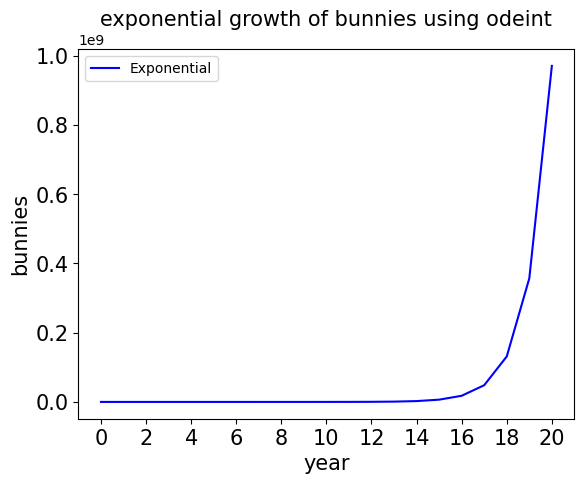

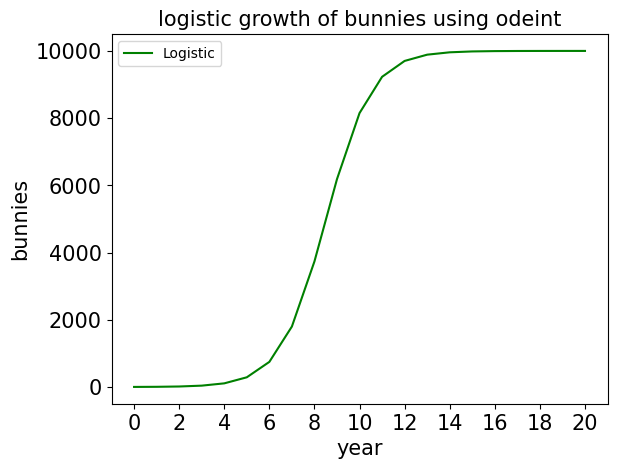

In [19]:
ex_vec = odeint(exponential, B0, tvec)
lg_vec = odeint(logistic, B0, tvec)
xticks = np.arange(0, years+1, 2)

plt.plot(tvec, ex_vec, label='Exponential', color='blue')
plt.title('exponential growth of bunnies using odeint',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('bunnies',fontsize=15)
plt.xticks(xticks, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

plt.plot(tvec, lg_vec, label='Logistic', color='green')
plt.title('logistic growth of bunnies using odeint',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('bunnies',fontsize=15)
plt.xticks(xticks, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

Now, let's see how the time step of the logistic model affects the integration.

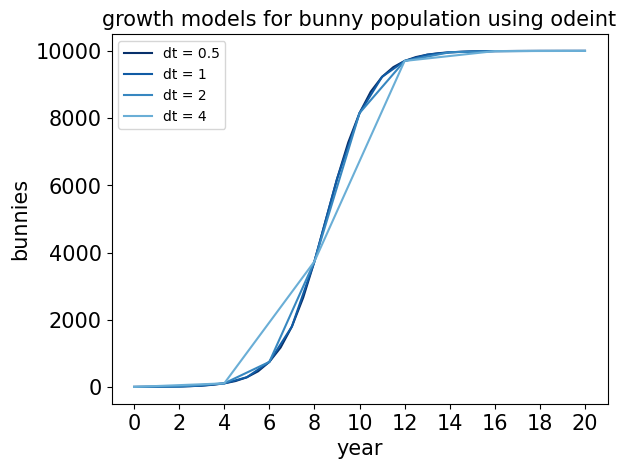

In [21]:
B0 = 2   # initial bunny population
k = 1    # per year
C = 10000 # carrying capacity
years = 20 # total number of years
dtvec = [0.5, 1, 2, 4] # per year
cmap = mpl.colormaps.get_cmap('Blues')
colors = [cmap(x) for x in np.linspace(1, 0.5, len(dtvec))]

for i,dt in enumerate(dtvec):
    tvec = np.arange(0,years+dt,dt) # time values evenly spaced by dt up to the number of input years
    Bvec = odeint(logistic, B0, tvec)
    plt.plot(tvec, Bvec, label='dt = {}'.format(dt), color=colors[i])
    
xticks = np.arange(0, years+1, 2)
plt.title('growth models for bunny population using odeint',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('bunnies',fontsize=15)
plt.xticks(xticks, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

### Solving more complex differential equations using odeint

Odeint is very versatile since it can solve (almost any) equation that you input. It does all the hard work for you. The key is to have an appropriate step size. Watch out "divide by zero" errors!

$ \frac{dx}{dt} = \text{sin}(x) \cdot \left( \frac{1}{x} + ax^2 + \frac{1}{x^5} + bx + c \right) $

In [22]:
def oh_no_why(x,t):
    dx = np.sin(x) * (1/x + a*x**2 + 1/x**5 + b*x + c)
    return dx

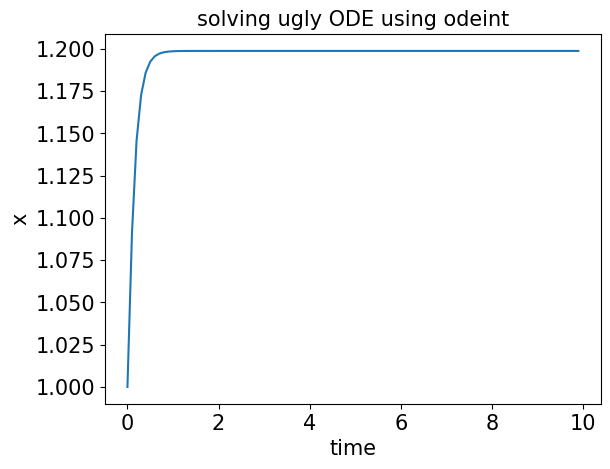

In [23]:
# define parameters
a = 1
b = -7
c = 12

# initial value of variable
x0 = 1

# time vector
tmax = 10
dt = 0.1
tvec = np.arange(0,tmax,dt)

# integrate!
yvec = odeint(oh_no_why, x0, tvec)

# plot!
plt.plot(tvec,yvec)
plt.title('solving ugly ODE using odeint',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ylabel('x',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()